# Auto Big-bench with GPT-4o mini
copyright 2024, Denis Rothman

*The potential of next generation of AI is to be able to evaluate and benchmark itself for a large range of tasks.*


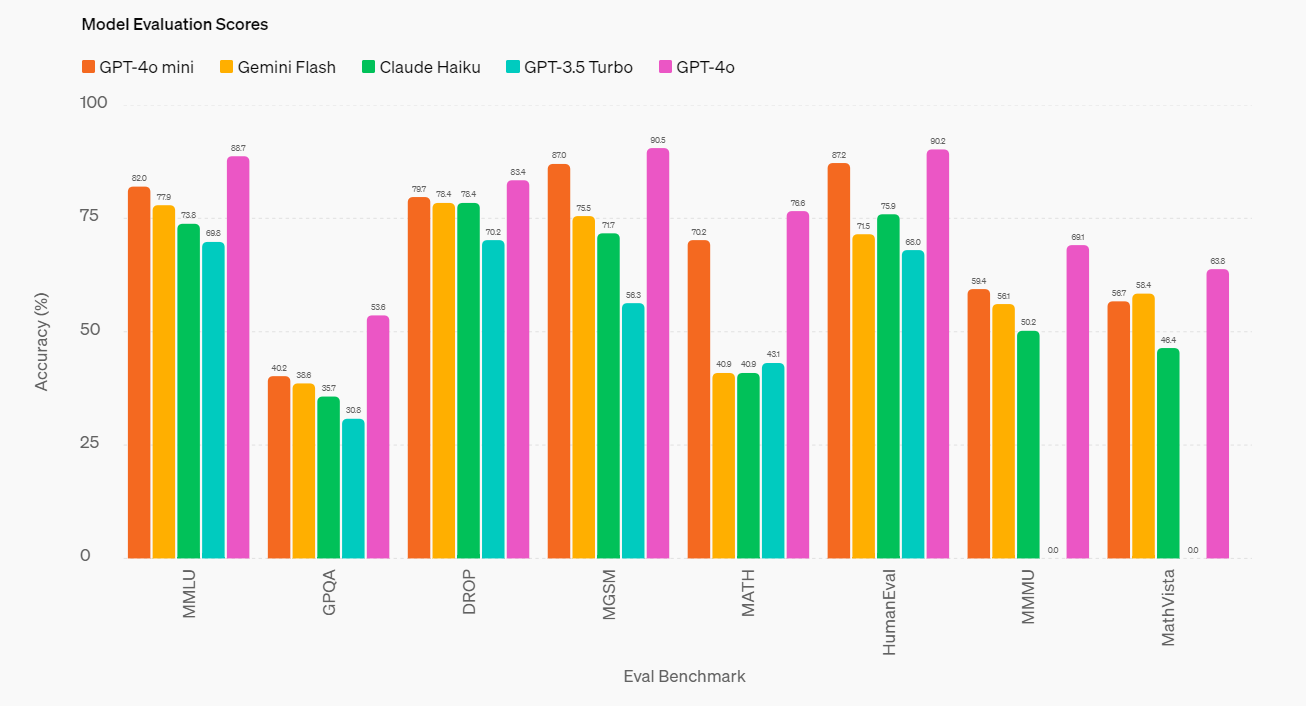

**1.Quality performance**
The quality performances are displayed in the cell above.

**2.Cost** on July 21, 2024.
The very low cost of GPT-4o-mini is displayed in the cell below.

**3. The Speed** is displayed at the end of the batch run of 144 tasks in this notebook.

*There is no doubt here. The speed was divided into two!*

**GPT-4o**
Response Time: 1659.37 seconds
Notebook in repo: Auto_Big_bench.ipynb

**GPT-4o-mini**

Response Time: 802.35 seconds
Notebook in repo: Auto Big-bench with GPT-4o-mini.ipynb

**Note**
Check the documentation before running this notebook for costs and usage:

https://platform.openai.com/docs/models

Also, this is an educational notebook. So, carefully choose the model adapted to the needs of your project before going into production.



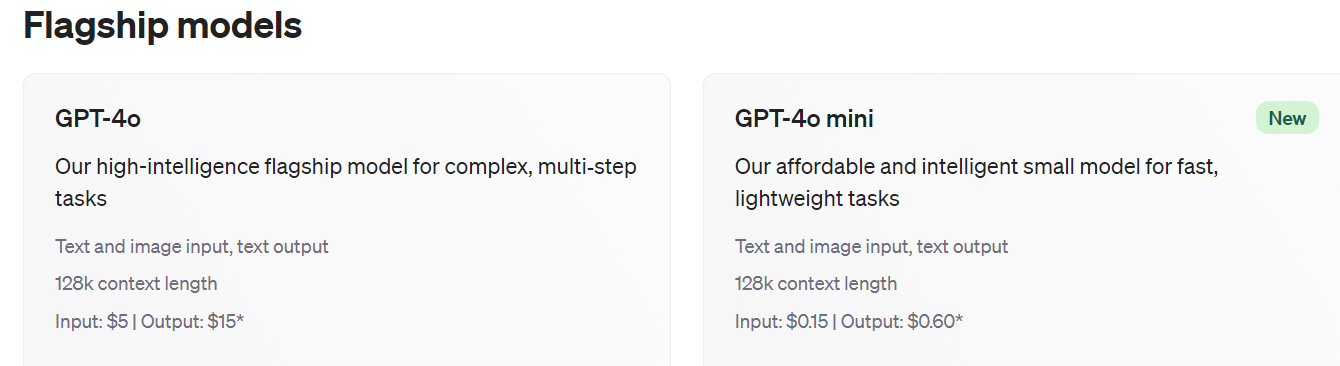

# Auto Big-bench introduction and history

**July 21,2024 upgrade** implementing GPT-4o mini to measure its performance (time, response). It is recommended to carefully evaluate LLM models for a specific project before making a decision to go into production.

**June 24, 2024 upgrade** improved processing speed measured with time metric

**May 15, 2024 upgrade** from `gpt-4` to `gpt4-o`

[Big-bench](https://github.com/google/BIG-bench/blob/main/bigbench/benchmark_tasks/README.md) contains more than 200+ NLP tasks. The goal is to evaluate a model.

In this notebook, we take LLMs a step further. We will not ask the LLM to solve a Big-bench NLP problem and apply metrics. We will ask the LLM to create the tasks itself and solve them!

The program will feed GPT-4o a sample of 140+ Big-bench tasks with a two-part prompt:   

**The first part contains the instruction:**    

**The second part is the description of a Big-bench:**  

**The output will then be displayed for human evaluation**
Human evaluation plays an important role in LLM training and evaluations. Reinforcement Learning with Human Feedback(RLHF) will help mitigate the potential limits of automated models and evaluation metrics.

**Limit of the program:** The program does not run thousands of samples for each task. The goal is to show the potential of Large Language Models(LLMs)

**Potential:** We can see that Foundations Models such as OpenAI and Google models are just the beginning of what will become *Massive Multitask Language Understanding(MMLU)* models in one form or another in the years to come.

# Install OpenAI

**June 24 update** OpenAI has updated its installation. There is no need to install cohere and tiktoken separately. OpenAI fixed the issue!
This installation has been now shortened to strictly OpenAI.

Note:
OpenAI in January 2024 requires dependencies that in turn require other dependencies that are installed after or before. On Google Colab(or your machine), if you encounter OpenAI installation issues, try the process below:  
a) uncomment and install cohere and run it after the `!pip install openai` cell<br>
b) uncomment and install tiktoken and run it after `!pip install cohere `  
c) then run `!pip install cohere ` again   
d) then run `!pip install openai` again   

Hopefully, OpenAI will fix this in 2024 and we will update the installation accordingly. This is normal on a fast-moving market. We simply need to be on the watch.

In [ ]:
#Importing openai
!pip install openai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 328.8/328.8 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 8.2 MB/s eta 0:00:00


In [ ]:
#API Key
#Store you key in a file and read it(you can type it directly in the notebook but it will be visible for somebody next to you)
from google.colab import drive
drive.mount('/content/drive')
f = open("drive/MyDrive/files/api_key.txt", "r")
API_KEY=f.readline()
f.close()

Mounted at /content/drive


In [ ]:
#The OpenAI Key
import openai
import os
os.environ['OPENAI_API_KEY'] =API_KEY
openai.api_key = os.getenv("OPENAI_API_KEY")

# Retrieve the list of Big-bench prompts designed for this notebook

The list was created from the list of tasks of [Big-bench](https://github.com/google/BIG-bench/blob/main/bigbench/benchmark_tasks/README.md)

In [ ]:
!curl -L https://raw.githubusercontent.com/Denis2054/Transformers_3rd_Edition/master/Chapter15/tasks.txt --output "tasks.txt"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 17838  100 17838    0     0  30650      0 --:--:-- --:--:-- --:--:-- 30702


# Read the file into a Pandas Dataframe

In [ ]:
import pandas as pd

# read the file
df = pd.read_csv('tasks.txt', header=None, on_bad_lines='skip')

# If you want to add a column name after loading
df.columns = ['Tasks']

# print the dataframe
df

,Tasks
0,1.Explain the following task 2.Provide an exam...
1,1.Explain the following task 2.Provide an exam...
2,1.Explain the following task 2.Provide an exam...
3,1.Explain the following task 2.Provide an exam...
4,1.Explain the following task 2.Provide an exam...
...,...
139,1.Explain the following task 2.Provide an exam...
140,1.Explain the following task 2.Provide an exam...
141,1.Explain the following task 2.Provide an exam...
142,1.Explain the following task 2.Provide an exam...


In [ ]:
nbt=len(df)
print("Number of tasks: ", nbt)

Number of tasks:  144


# Defining the rolel of the model

In [ ]:
import openai
from openai import OpenAI

client = OpenAI()
gptmodel="gpt-4o-mini"

def openai_chat(input_text):
    response = client.chat.completions.create(
        model=gptmodel,
        messages=[
            {"role": "system", "content": "You are an expert Natural Language Processing exercise expert."},
            {"role": "assistant", "content": "1.You can explain any NLP task. 2.Create an example 3.Solve the example"},
            {"role": "user", "content": input_text}
        ],
        temperature=0.1  # Add the temperature parameter here and other parameters you need
    )
    return response.choices[0].message.content

# Displaying the response of the model

In [ ]:
from IPython.core.display import display, HTML
def display_response(input_text, response, bb_task):
  html_content = f"""
  <!DOCTYPE html>
  <html>
  <head>
      <title>Big-bench Tasks</title>
      <style>
        p {{
            max-width: 600px;
        }}
    </style>
  </head>
  <body>
      <h1>{bb_task}</h1>
      <p>{task}</p>
  </body>
  </html>
  """

  # And finally we display it
  display(HTML(html_content))
  html_file = open("output.html", "a")
  html_file.write(html_content)
  html_file.close()

In [ ]:
html_file = open("output.html", "w") #just to make sure a new file is created before running the tasks to avoid
html_file.close()                    #processing large files.

# Running the tasks

Check OpenAI's policy for rate limits before running the tasks:
https://platform.openai.com/docs/guides/rate-limits/overview


In [ ]:
import time

start_time = time.time()  # Start timing before the request

counter = 0
nb_tasks = nbt
for index, row in df.iterrows():
    input_text = row['Tasks']                 # the complete prompt
    counter += 1                              # task counter
    if counter > nb_tasks:
        break                                 # nb of tasks
    task = openai_chat(input_text)            # model call
    task = task.replace('\n', '<br>')         # formatting the output
    parts = input_text.split('Solve it:')     # extracting the task from the input
    bb_task = parts[1].strip()                # The strip() function
    display_response(input_text, task, bb_task) # displaying the task and response

    if counter % 20 == 0:                     # if the counter is divisible by 50
        print(f"Processed {counter} tasks.")
        #time.sleep(60)                        # pause for 60 seconds

response_time = time.time() - start_time  # Measure response time
print(f"Response Time: {response_time:.2f} seconds")  # Print response time

Processed 20 tasks.


Processed 40 tasks.


Processed 60 tasks.


Processed 80 tasks.


Processed 100 tasks.


Processed 120 tasks.


Processed 140 tasks.


Response Time: 802.35 seconds
